Rong Wang, rongwww, 1619779944

Combined Cycle Power Plant Data Set

The dataset contains data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

In [376]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

(b) Exploring the data:
    
i. How many rows are in this data set? 
   How many columns?  
   What do the rows and columns represent?

In [377]:
data = pd.read_excel('../Data/CCPp/Folds5x2_pp.xlsx', sheet_name = "Sheet1")
print("Number of rows: ", len(data))
print("Number of columns: ", len(data.columns))
print("Column represent 'AT', 'V', 'AP', 'RH', 'PE', stands for Ambient Temperature, Exhaust Vacuum, Ambient Pressure, Relative Humidity, Electrical Energy Output.")
print("Rows represent all the instances, all the date points.")

Number of rows:  9568
Number of columns:  5
Column represent 'AT', 'V', 'AP', 'RH', 'PE', stands for Ambient Temperature, Exhaust Vacuum, Ambient Pressure, Relative Humidity, Electrical Energy Output.
Rows represent all the instances, all the date points.


ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

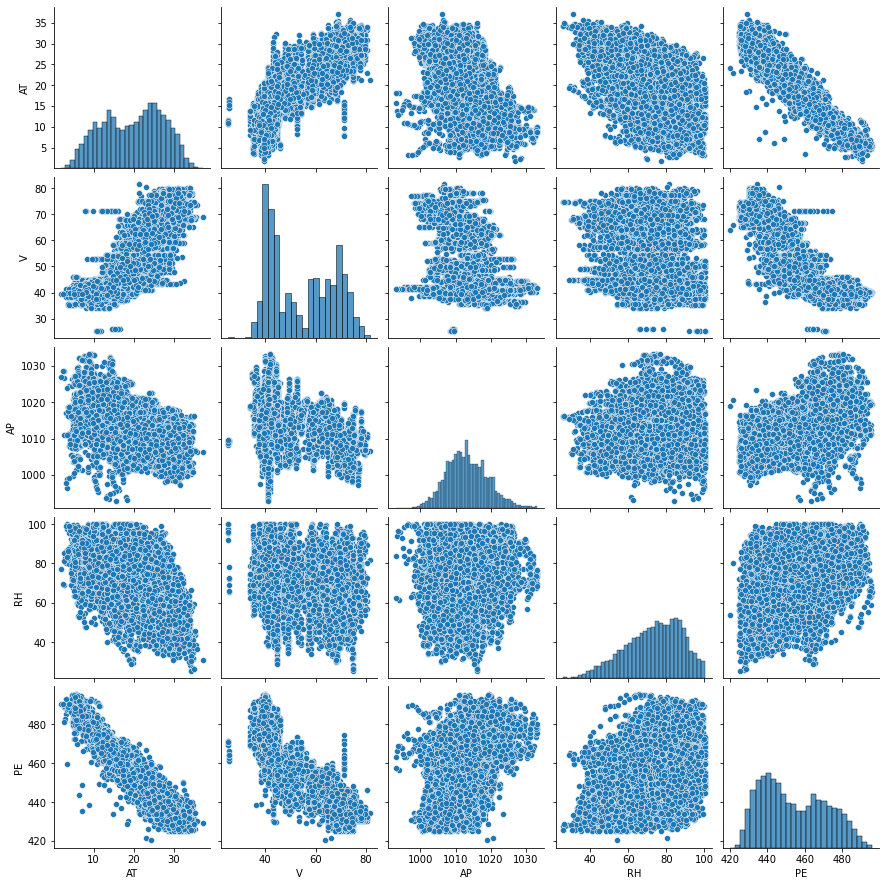

In [378]:
sns.pairplot(data)

From the pairwise scatterplots, we can see that AT and PE has a linear relationship. For V, AP, RH, they don't show a clear linear relationship with PE.

iii. What are the mean, the median, range, first and third quartiles, and in- terquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [379]:
data_description = pd.DataFrame(columns = (['column name', 'mean', 'median', 
                                            'range', 'first quartile', 'third quartile', 'interquartile range']))
for i in range(0, len(data.columns)):
        mean = data[data.columns[i]].describe()['mean']
        median = data[data.columns[i]].describe()['50%']
        col_range = data[data.columns[i]].describe()['max'] - data[data.columns[i]].describe()['min']
        q1 = data[data.columns[i]].describe()['25%']
        q3 = data[data.columns[i]].describe()['75%']
        interquartile = q3 - q1  # The interquartile range (IQR) contains the second and third quartiles,
        data_description = data_description.append ({'column name' : data.columns[i],
                                 'mean' : mean,
                                 'median' : median,
                                  'range' : col_range,
                                  'first quartile' : q1,
                                  'third quartile' : q3,
                                  'interquartile range' : interquartile
                                 }, ignore_index = True)
data_description

,column name,mean,median,range,first quartile,third quartile,interquartile range
0,AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
1,V,54.305804,52.080,56.20,41.7400,66.54,24.8000
2,AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
3,RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
4,PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


(c) For each preditor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

<Figure size 432x288 with 0 Axes>

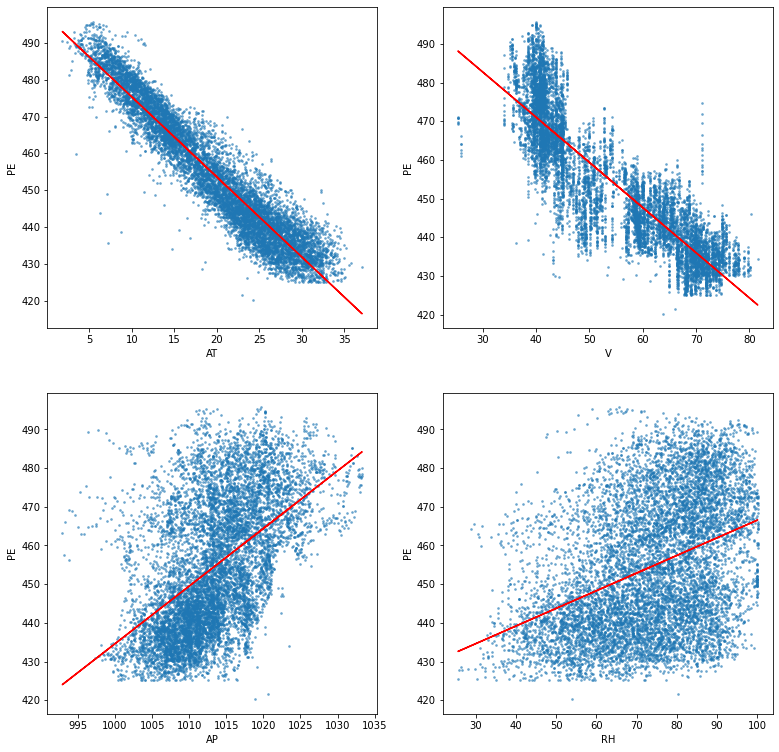

In [380]:
features = ['AT', 'V', 'AP', 'RH']
y_true = np.array(data["PE"])

uniCoefficient = [] # for later use in e.

plt.figure()
fig = plt.subplots(2,2,figsize=(13,13))

n = 1
for feature in features:
    x_data = np.array(data[feature]).reshape((-1, 1))
    model = LinearRegression()
    model.fit(x_data, y_true)
    y_pred = model.predict(x_data)
    
    plt.subplot(2,2,n)
    plt.xlabel(feature)
    plt.ylabel('PE')
    plt.scatter(x_data, y_true, label="y_true", s=3, alpha=0.5)
    plt.plot(x_data, y_pred, color='r', label="y_pred")
    
    uniCoefficient.append(model.coef_)
    n += 1

Code reference: https://realpython.com/linear-regression-in-python/

The results are shown above as plots.

In the 1st model "AT" and "PE", there is a statistically significant association between the predictor and the response. In the plot, y_pred and y_true show the same trend, and the y_pred is around in the middle of the scatter plot of the y_true. 

The 2nd model "V" adn "PE" also shows the association between the predictor and the response, but not as good as the "AT".

There are a few data points in the 1st plot that are far away from the "cloud" of points. So the red line in the plot tends to lean left. If we remove these outliers, we may have better fit in the up-left corner, the red line would be more in the middle of the up-left corner points.

There are also a few points in the 2nc plot, that forms a vertical line on the left, adn vertical line on the right. It may affect the linear regression model.

There are many points in teh 3rd and 4th plot that are far away from the red line, but there is no significant outliers since the linear regression does not fit very well here.

(d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 :βj =0?

In [381]:
features = ['AT', 'V', 'AP', 'RH']
x_data = np.array(data[features])
y_true = np.array(data["PE"])

# print(x_data)

multipleRegression = LinearRegression().fit(x_data, y_true)

multiCoefficient = multipleRegression.coef_
print("multiCoefficient: ", multiCoefficient)

# Stats Model
xData = sm.add_constant(x_data)
# Oridinary Learst Squares
model = sm.OLS(y_true, xData).fit()
# Statsmodels
print(model.summary())
print(model.pvalues)

multiCoefficient:  [-1.97751311 -0.23391642  0.06208294 -0.1580541 ]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:28:30   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

For P-value, it is used to measure whether the variable has an impact on the model. Low P-value indicates that the parameter is significant.

For R-square, it is used to measure the effect of variable variance on the total variance. A low R-square indicates that the model is affected by error(noise) heavily and does not fit well (underfit).

According to the P-values above, all less than 0.05, implying that all the predictors impose a significant effect on the response, We can reject the null hypothsis.

(e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.


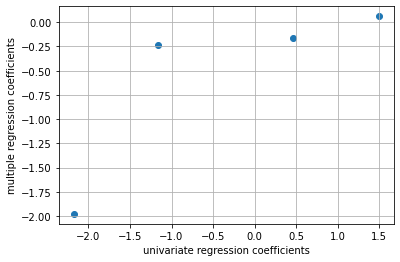

In [389]:
plt.xlabel('univariate regression coefficients')
plt.ylabel('multiple regression coefficients')

plt.scatter(uniCoefficient, multiCoefficient)
plt.grid()

# print(uniCoefficient)
# print(multiCoefficient)

From 1c, no significant relationship between RH and PE, but in the 1d, the pvalue is smaller than 0.05, so it rejects my assumption from 1c.  We can not just rely on the pairwise plots to say if a predictor has no significant affect on the "PE".

(f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form2
Y =β0 +β1X+β2X2 +β3X3 +ε


Predictor: AT
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:45:25   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    7

<Figure size 432x288 with 0 Axes>

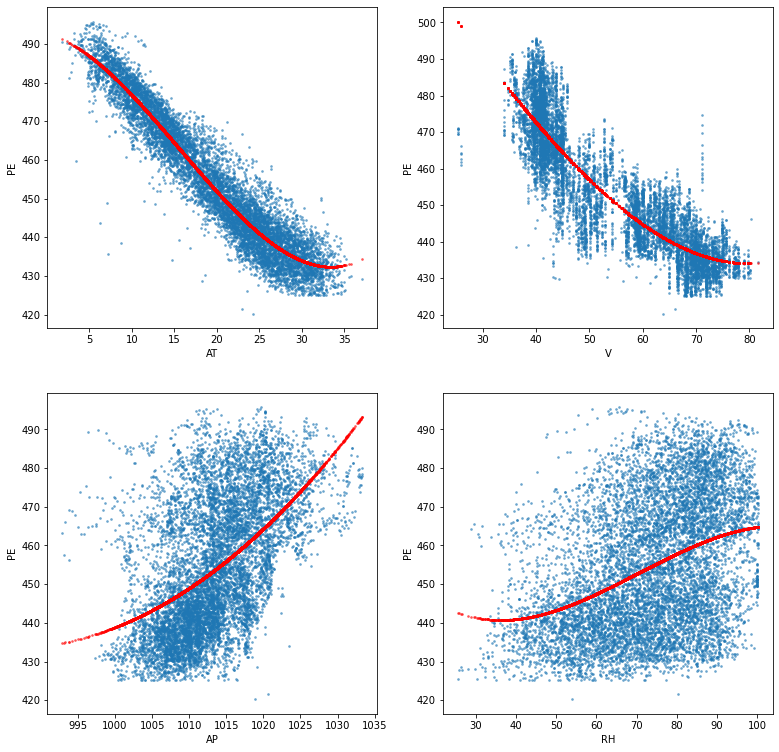

In [390]:
plt.figure()
fig = plt.subplots(2,2,figsize=(13,13))
n = 1

for feature in features:
    x_data = np.array(data[feature]).reshape((-1, 1))
    poly = PolynomialFeatures(degree = 3)
    xDataTrans = poly.fit_transform(x_data)
    sm.add_constant(xDataTrans)
    poly_model = sm.OLS(y_true, xDataTrans).fit()
    
    print('\nPredictor:', feature)
    print(poly_model.summary())
    
    y_pred_poly = poly_model.predict(xDataTrans)
    plt.subplot(2,2,n)
    plt.xlabel(feature)
    plt.ylabel('PE')
    plt.scatter(x_data, y_true, label="y_true", s=3, alpha=0.5)
    plt.scatter(x_data, y_pred_poly, color='r', label="y_pred_poly degree=3", s=3, alpha=0.5)
    
    n += 1

From pvalues and R-squared, we can see that AT, AP, RH have significant relationship with PE. But for V, the coefficient for X^2 is bigger than 0.005, so it is statistically insignificant.

(g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [384]:
# Y = bias + b1x1 + b2x2 + b3x3 + b4x4 + b5x1x2 + b6x1x3 + b7x1x4 + b8x2x3 + b9x2x4 + b10x3x4
# not include the polynomial, only the interactions. ie. x1x2, but not x1x1.
poly = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = True)
xDataTrans = poly.fit_transform(data[features])

sm.add_constant(xDataTrans)
OLSmodels = sm.OLS(y_true, xDataTrans)

OLSresults = OLSmodels.fit()
print(OLSresults.summary())
print(OLSresults.pvalues)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:28:31   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

we can find that Temperature x Exhaust Vacuum, Temperature x Relative Humidity, Exhaust Vacuum x Ambient Pressure and Ambient Pressure x Relative Humidity have a small p-value, implying that they are statistically significant.

The insignificant terms are: AT:AP with a pvalue 0.452, V:RH with a pvalue 0.086.

(h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [385]:
# Train the regression model on a randomly selected 70% subset of the data with all predictors.
x_train, x_test, y_train, y_test = train_test_split(data[features], data["PE"], test_size = .3, random_state=42)

x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()

train_pred = model.predict(x_train)
trainMSE = mean_squared_error(y_train, train_pred)
print('The train MES:', trainMSE)

x_test = sm.add_constant(x_test)
test_pred = model.predict(x_test)
testMSE = mean_squared_error(y_test, test_pred)
print('The test MES:', testMSE)

The train MES: 20.580839725738695
The test MES: 21.239856938225813


In [386]:
# Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, 
# and remove insignificant variables using p-values (be careful about interaction terms).
formula = 'PE ~ AT + V + AP + RH + I(AT**2) + I(V**2) + I(AP**2) + I(RH**2) + AT:V + AT:AP + AT:RH + V:AP + V:RH + AP:RH'

regression = smf.ols(formula = formula, data = pd.concat([x_train, pd.DataFrame(y_train)],axis = 1))
model = regression.fit()

trainPredict = model.predict(sm.add_constant(x_train))
testPredict = model.predict(sm.add_constant(x_test))

trainMSE = mean_squared_error(y_train, trainPredict)
testMSE = mean_squared_error(y_test, testPredict)

print("The train MSE: {}".format(trainMSE))
print("The test MSE: {}\n".format(testMSE))
print(model.summary())
print(model.pvalues)


The train MSE: 17.88779961663328
The test MSE: 18.647312478588063

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7272.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:28:31   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6682   BIC:                         3.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [387]:
# remove with p values
# we still need V here, even the pvalue for v is > 0.05, because other interactions need V.
newFormula = 'PE ~ AT + V + AP + RH + I(AT**2) + I(AP**2) + I(RH**2) + AT:V + AT:RH + AP:RH'
regression = smf.ols(formula = newFormula, data = pd.concat([x_train, pd.DataFrame(y_train)],axis = 1))
model = regression.fit()
# model.get_feature_names()
trainPredict = model.predict(sm.add_constant(x_train))
testPredict = model.predict(sm.add_constant(x_test))
trainMSE = mean_squared_error(y_train, trainPredict)
testMSE = mean_squared_error(y_test, testPredict)
print("After removing unsignificant terms, the train MSE: {}".format(trainMSE))
print("After removing unsignificant terms, the test MSE: {}".format(testMSE))
print(model.summary())
print(model.pvalues)

After removing unsignificant terms, the train MSE: 17.91781267118549
After removing unsignificant terms, the test MSE: 18.694346190803156
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.017e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:28:31   Log-Likelihood:                -19166.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6686   BIC:                         3.843e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      

After we remove some insignificant variables, the train and test errors don't change much, based on the random_state=42.

(i) KNN Regression:
i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

min_error_test_raw:  15.726819842563568
min_k_error_test_raw:  5
min_error_test_nor:  14.348653474399166
min_k_error_test_nor:  4


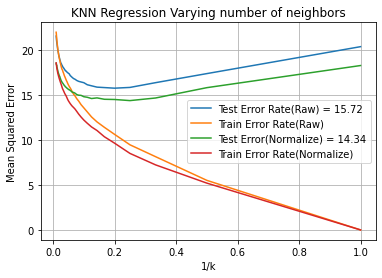

In [388]:
# Raw feature
x_train, x_test, y_train, y_test = train_test_split(data[features], data["PE"], test_size = .3, random_state=42)

# Normalized, do not normalize the target values, only the input features.

# transformer = Normalizer().fit(data[features])
# x_data_normalize = transformer.transform(data[features])
# x_train_nor, x_test_nor, y_train_nor, y_test_nor = train_test_split(x_data_normalize, data["PE"], test_size = .3, random_state=42)

min_max_scaler = preprocessing.MinMaxScaler()
normal_pred = min_max_scaler.fit_transform(data[features])
x_train_nor, x_test_nor, y_train_nor, y_test_nor = train_test_split(normal_pred, data["PE"], test_size = .3, random_state=42)

# x_train_nor = min_max_scaler.fit_transform(x_train)
# x_test_nor = min_max_scaler.fit_transform(x_test)
# y_train_nor = y_train
# y_test_nor = y_test

k_list = np.arange(1, 101)
train_error_raw, test_error_raw = [], []
train_error_nor, test_error_nor = [], []

for k in range(1,101,1):
    knn_raw = KNeighborsRegressor(n_neighbors=k).fit(x_train, y_train)
    y_train_pred = knn_raw.predict(x_train)
    y_test_pred = knn_raw.predict(x_test)
    train_error_raw.append(mean_squared_error(y_train, y_train_pred))
    test_error_raw.append(mean_squared_error(y_test, y_test_pred))
    
    knn_nor = KNeighborsRegressor(n_neighbors=k).fit(x_train_nor, y_train_nor)
    y_train_pred_nor = knn_nor.predict(x_train_nor)
    y_test_pred_nor = knn_nor.predict(x_test_nor)
    train_error_nor.append(mean_squared_error(y_train_nor, y_train_pred_nor))
    test_error_nor.append(mean_squared_error(y_test_nor, y_test_pred_nor))
    
min_error_test_raw = np.min(test_error_raw)
min_k_error_test_raw =test_error_raw.index(min_error_test_raw) + 1  # index start at 0, but k starts at 1.
print("min_error_test_raw: ", min_error_test_raw)
print("min_k_error_test_raw: ", min_k_error_test_raw)

min_error_test_nor = np.min(test_error_nor)
min_k_error_test_nor = test_error_nor.index(min_error_test_nor) + 1  # index start at 0, but k starts at 1.
print("min_error_test_nor: ", min_error_test_nor)
print("min_k_error_test_nor: ", min_k_error_test_nor)


plt.title('KNN Regression Varying number of neighbors')
plt.plot(1 / k_list, test_error_raw, label='Test Error Rate(Raw) = ' + str(min_error_test_raw)[:5])
plt.plot(1 / k_list, train_error_raw, label='Train Error Rate(Raw)')
plt.plot(1 / k_list, test_error_nor, label='Test Error(Normalize) = ' + str(min_error_test_nor)[:5])
plt.plot(1 / k_list, train_error_nor, label='Train Error Rate(Normalize)')
plt.legend()
plt.grid(True)
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error')
plt.show()


(j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

From KNN Regression, the smallest test error is 14.35.
From the Linear Regression, the smallest test error is 18.65.
So we can say that KNN regression is better than Linear Regression on this issue.

2. ISLR: 2.4.1
For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

(a) The sample size n is extremely large, and the number of predictors p is small.

    flexible statistical learning method would perform better. If we use inflexible method, we may not be able to fit the data every well. 

(b) The number of predictors p is extremely large, and the number of observations n is small.

    Inflexible method performs better. If we use flexible method, we may overfit, so inflexible method is enough.

(c) The relationship between the predictors and response is highly non-linear.

    Flexible method is better. Because the relationship is highly non-linear, so it requires a more complex model with more parameters to better fit the data.

(d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.

    Inflexible method is better. Because the flexible method has more freedom, with a smaller bias, but hight variance. So here we should use inflexible method to prevent the error gets even higher.

3. ISLR: 2.4.7
The table below provides a training data set containing six observa- tions, three predictors, and one qualitative response variable.
Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.

(a) Compute the Euclidean distance between each observation and thetestpoint,X1 =X2 =X3 =0.

    Obs 1: (0 + 3^2 + 0)^0.5 = 3

    Obs 2: (2^2 + 0 + 0)^0.5 = 2

    Obs 3: (0 + 1^2 + 3^2)^0.5 = 3.162

    Obs 4: (0 + 1^2 + 2^2)^0.5 = 2.236

    Obs 5: ((-1)^2 + 0 + 1^2)^0.5 = 1.414

    Obs 6: (1^2 + 1^2 + 1^2)^0.5 = 1.732

(b) What is our prediction with K = 1? Why?

    Green. Because the closest neighbor if the obs 5, which is Green.

(c) What is our prediction with K = 3? Why?

    The closest 3 neighbots are obs 2, 5, 6. So the prediction is Red.

(d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

    Small. The model has high flexibility. When k increasing, the model's flexibility will decrease. So a high flexibility model suggests a smaller k.